In [2]:
# -*- coding: utf8 -*-
%matplotlib inline
import codecs
import features
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pickle
import math

In [3]:
import datetime
def dateheure():
    return datetime.datetime.utcnow().strftime('%y%m%d%H%M')

typeEchantillon : 
- fixe pour utiliser tailleEchantillon
- variable pour utiliser nombre,increment
- total pour utiliser tout le lexique

In [12]:
filePrefix="MGC-151206"
lexiquePrefix="MGC-150815"
#exportName="MGC-151208-MoyennesFormes.csv"
nomLexique="/Users/gilles/ownCloud/Python/phonemisation/bdlexique-PDM-Resync.txt"
repertoire="/Users/gilles/ownCloud/Recherche/Boye/"
sousRepertoire="2015-Data/MGC-1512/"


In [5]:
rangsEchantillons=5
nombreEchantillons=20
echantillonPrefix="-extend"

##Importations
- codecs pour les encodages
- pandas et numpy pour les calculs sur tableaux
- matplotlib pour les graphiques
- itertools pour les itérateurs sophistiqués (paires sur liste, ...)

In [6]:
#%pylab inline
#pd.options.display.mpl_style = 'default'
debug=False

In [7]:
bdlexiqueIn = unicode(u"èò")
bdlexiqueNum = [ord(char) for char in bdlexiqueIn]
neutreOut = unicode(u"EO")
neutralise = dict(zip(bdlexiqueNum, neutreOut))

In [8]:
def recoder(chaine,table=neutralise):
    if type(chaine)==str:
        temp=unicode(chaine.decode('utf8')).translate(table)
        result=temp.encode('utf8')
    elif type(chaine)==unicode:
        result=chaine.translate(table)
    return result

###Définition des cases
- principales pour le paradigme courant
- secondaires pour les cases rares
- totales pour le tout

In [9]:
casesPrincipales= [
        'inf', 'pi1S', 'pi2S', 'pi3S', 'pi1P', 'pi2P', 'pi3P', 'ii1S',
        'ii2S', 'ii3S', 'ii1P', 'ii2P', 'ii3P', 
        'fi1S', 'fi2S', 'fi3S', 'fi1P', 'fi2P',
        'fi3P', 'pI2S', 'pI1P', 'pI2P', 'ps1S', 'ps2S', 'ps3S', 'ps1P',
        'ps2P', 'ps3P', 
        'pc1S', 'pc2S', 'pc3S', 'pc1P', 'pc2P', 'pc3P', 'pP',
        'ppMS', 'ppMP', 'ppFS', 'ppFP'
            ]
casesSecondaires= [
       'ai1S', 'ai2S', 'ai3S', 'ai1P', 'ai2P', 'ai3P', 'is1S', 'is2S', 'is3S', 'is1P', 'is2P', 'is3P'
            ]
casesTotales=casesPrincipales+casesSecondaires
listeCases=casesTotales

In [14]:
dictEchantillons={}
for rangEchantillon in range(rangsEchantillons):
    dictEchantillons[rangEchantillon]={}
    for numEchantillon in range(nombreEchantillons):
        dictEchantillons[rangEchantillon][numEchantillon]=pd.read_csv(repertoire+sousRepertoire+filePrefix+echantillonPrefix+"-%02d"%numEchantillon+"-%02d"%(rangEchantillon+1)+"-paradigmes.csv",sep=";",encoding="utf8")
        dictEchantillons[rangEchantillon][numEchantillon]["nbFormes-%02d"%numEchantillon]=50-dictEchantillons[rangEchantillon][numEchantillon].isnull().sum(axis=1)

In [31]:
for iEchantillon in range(nombreEchantillons):
    print dictEchantillons[0][iEchantillon][dictEchantillons[0][iEchantillon]["nbFormes-%02d"%iEchantillon]==1]["lexeme"].count()

877
0
833
834
0
0
0
854
0
0
0
900
0
0
0
0
0
0
0
882


# problème avec les tirages
- pas de singleton pour presque tous
- plein de singletons pour les autres

In [32]:
dictEchantillons[0][1]

,Unnamed: 0,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,...,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S,nbFormes-01
0,0,abaisser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abEse,NaN,NaN,NaN,NaN,NaN,NaN,7
1,1,abandonner,NaN,abâdOnE,NaN,NaN,abâdOnEr,abâdOna,NaN,abâdOn6rE,...,abâdOne,abâdOne,abâdOne,NaN,NaN,NaN,abâdOn,abâdOn,abâdOn,22
2,2,abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abazurdi,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,abattre,NaN,NaN,NaN,NaN,NaN,abati,NaN,NaN,...,abaty,abaty,abaty,NaN,NaN,NaN,NaN,NaN,abat,12
4,4,abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abdike,NaN,NaN,NaN,NaN,NaN,NaN,3
5,5,abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,6,abolir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,abOli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7,7,abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8,8,abonner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abOne,NaN,NaN,NaN,NaN,NaN,NaN,2
9,9,aborder,NaN,NaN,NaN,NaN,NaN,abOrda,NaN,NaN,...,abOrde,NaN,abOrde,NaN,NaN,NaN,NaN,NaN,NaN,8


In [ ]:
for element in dictEchantillons[0][0][dictEchantillons[0][0]["lexeme"]=="acclamer"]:
    print dictEchantillons[0][0][dictEchantillons[0][0]["lexeme"]=="acclamer"][element],
dictEchantillons[0][0][dictEchantillons[0][0]["nbFormes-00"]==1]

In [14]:
nombreFormes={}
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]=dictEchantillons[rangEchantillon][0][["lexeme","nbFormes-00"]]

In [15]:
for rangEchantillon in range(rangsEchantillons):
    for numEchantillon in range(1,nombreEchantillons):
    #    print numEchantillon
        nombreFormes[rangEchantillon]=pd.merge(
            nombreFormes[rangEchantillon],
            dictEchantillons[rangEchantillon][numEchantillon][["lexeme","nbFormes-%02d"%numEchantillon]],
            how="outer",
            on="lexeme")

In [61]:
barFormes={}
for rangEchantillon in range(rangsEchantillons):
    barFormes[rangEchantillon]=nombreFormes[rangEchantillon][["lexeme","nbFormes-00"]].groupby("nbFormes-00").count().reset_index()
    barFormes[rangEchantillon].columns=["nbFormes","L01"]
#    print "rang",rangEchantillon
    for numEchantillon in range(1,nombreEchantillons):
        barFormesEchantillon=nombreFormes[rangEchantillon][["lexeme","nbFormes-%02d"%numEchantillon]].groupby("nbFormes-%02d"%numEchantillon).count().reset_index()
        barFormesEchantillon.columns=["nbFormes","L%02d"%(numEchantillon+1)]
        barFormes[rangEchantillon]=pd.merge(
            barFormes[rangEchantillon],
            barFormesEchantillon,
            how="outer"
        )
#        print "num",numEchantillon

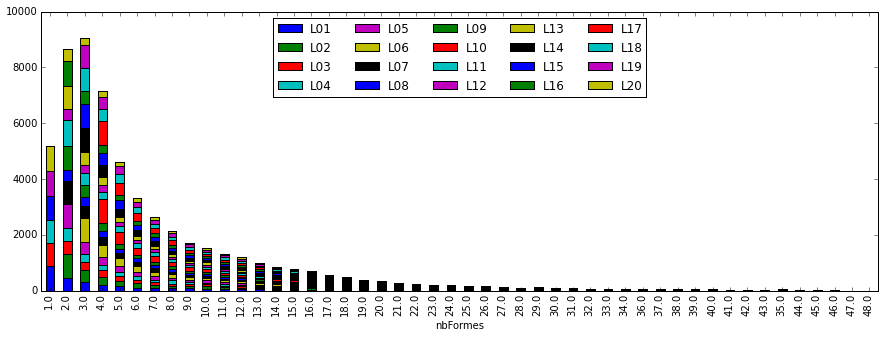

In [314]:
fig=plt.figure()
ax=fig.add_subplot(111)
barFormes[0].plot(x="nbFormes",kind="bar",figsize=(15,5),stacked=True,ax=ax).legend(loc='upper center', ncol=5)#.tight_layout()
ax.set_xticklabels=list(np.arange(5,50,5))
plt.savefig(repertoire+'NbFormes.eps')

In [ ]:
bdlexique=pd.read_csv(nomLexique,sep=";",names=["ortho","phono","ext","cs","ms","vs","lexeme","L23","lemmeFrantext","lemmeFilms","formeFrantext","formeFilms"],encoding="utf8")
bdlexique.loc[(bdlexique["ms"]=="ij")&(bdlexique["cs"].isin(["V","K"])),"ms"]="MS"
bdlexique.drop_duplicates(inplace=True,subset=["phono","ext","cs","ms","vs","lexeme","lemmeFrantext","lemmeFilms","formeFrantext","formeFilms"])

verbesBDL=bdlexique[bdlexique["cs"]=="V"][["lexeme","lemmeFrantext","lemmeFilms"]]
verbesBDL.drop_duplicates(inplace=True,subset=["lexeme","lemmeFrantext","lemmeFilms"])
verbesBDL.loc[verbesBDL["lemmeFrantext"]=="***","lemmeFrantext"]=np.nan
verbesBDL["lemmeFrantext"]=verbesBDL["lemmeFrantext"].astype("float64")
verbesBDL.loc[verbesBDL["lemmeFilms"]=="***","lemmeFilms"]=np.nan
verbesBDL["lemmeFilms"]=verbesBDL["lemmeFilms"].astype("float64")

In [342]:
verbesBDL["lemmeFrequence"]=(verbesBDL["lemmeFrantext"]+verbesBDL["lemmeFilms"])/2

In [377]:
hyperFrequents=verbesBDL.sort_values(by="lemmeFrequence",ascending=False)["lexeme"].head(n=100).tolist()

In [193]:
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]["moyenne-%02d"%rangEchantillon]=nombreFormes[rangEchantillon].sum(axis=1)/20

In [194]:
for rangEchantillon in range(rangsEchantillons):
    nombreFormes[rangEchantillon]["std-%02d"%rangEchantillon]=nombreFormes[rangEchantillon].std(axis=1)

In [195]:
moyenneFormes=nombreFormes[0][["lexeme","moyenne-00","std-00"]]
#moyenneFormes

In [196]:
for rangEchantillon in range(1,rangsEchantillons):
    moyenneFormes=pd.merge(
        moyenneFormes,
        nombreFormes[rangEchantillon][["lexeme","moyenne-%02d"%rangEchantillon,"std-%02d"%rangEchantillon]],
        how="inner",
        on="lexeme"
    )

In [197]:
moyenneFormes=pd.merge(moyenneFormes,lexemesFreqs[["lexeme","logProb"]],how="left")

In [198]:
moyenneFormes=pd.merge(moyenneFormes,verbesBDL[["lexeme","lemmeFrantext","lemmeFilms"]],how="left")

In [199]:
seuil=20
nbOccurrences={}
for numEchantillon in range(nombreEchantillons):
    for lexeme in nombreFormes[0].sort_values(by="nbFormes-%02d"%numEchantillon,ascending=False)["lexeme"].head(n=seuil).tolist():
        if not lexeme in nbOccurrences:
            nbOccurrences[lexeme]=0
        nbOccurrences[lexeme]+=1

for lexeme in sorted(nbOccurrences, key=nbOccurrences.get):
    print lexeme, nbOccurrences[lexeme]

ouvrir 1
chercher 1
vivre 1
rendre 1
demander 1
sentir 1
tenir 1
croire 4
entendre 4
parler 8
arriver 8
sortir 9
partir 10
mettre 10
revenir 11
rester 11
laisser 14
prendre 15
aimer 16
donner 17
passer 18
savoir 18
dire 20
pouvoir 20
avoir 20
venir 20
devoir 20
trouver 20
voir 20
être 20
faire 20
vouloir 20
aller 20


In [379]:
nbLex=10
nbSeuil=15
nbOccurrences={}
for numEchantillon in range(nombreEchantillons):
    for lexeme in nombreFormes[0][nombreFormes[0]["nbFormes-%02d"%numEchantillon]>nbSeuil]["lexeme"].tolist():
        if not lexeme in nbOccurrences:
            nbOccurrences[lexeme]=0
        nbOccurrences[lexeme]+=1

hyperFrequentsFound={lex:False for lex in hyperFrequents}
for lexeme in sorted(nbOccurrences, key=nbOccurrences.get):
    if lexeme in hyperFrequents:
        print "HF",lexeme, nbOccurrences[lexeme]
        hyperFrequentsFound[lexeme]=True
#    else:
#        print "LF",lexeme, nbOccurrences[lexeme]
print
for num,lexeme in enumerate(hyperFrequents):
    if not hyperFrequentsFound[lexeme]:
        print "not found", lexeme,nombreFormes[0][nombreFormes[0]["lexeme"]==lexeme].iloc[0]["moyenne-00"]
    elif num<10:
        print "ok", lexeme, nombreFormes[0][nombreFormes[0]["lexeme"]==lexeme].iloc[0]["moyenne-00"]

HF excuser 1
HF paraître 12
HF espérer 15
HF plaire 18
HF rire 18
HF sembler 18
HF foutre 19
HF reprendre 20
HF rentrer 20
HF aider 20
HF devenir 20
HF pouvoir 20
HF donner 20
HF revenir 20
HF continuer 20
HF garder 20
HF voir 20
HF apprendre 20
HF lever 20
HF attendre 20
HF tirer 20
HF gagner 20
HF écouter 20
HF changer 20
HF appeler 20
HF aimer 20
HF commencer 20
HF finir 20
HF sortir 20
HF entrer 20
HF sentir 20
HF boire 20
HF acheter 20
HF lire 20
HF mettre 20
HF vivre 20
HF payer 20
HF vouloir 20
HF tuer 20
HF partir 20
HF devoir 20
HF retourner 20
HF comprendre 20
HF dire 20
HF mourir 20
HF tenir 20
HF écrire 20
HF passer 20
HF aller 20
HF connaître 20
HF perdre 20
HF entendre 20
HF toucher 20
HF rendre 20
HF prendre 20
HF montrer 20
HF trouver 20
HF tourner 20
HF manger 20
HF croire 20
HF jeter 20
HF raconter 20
HF souvenir 20
HF quitter 20
HF demander 20
HF parler 20
HF occuper 20
HF penser 20
HF venir 20
HF suivre 20
HF servir 20
HF arriver 20
HF marcher 20
HF asseoir 20
HF re

In [365]:
nombreFormes[0][nombreFormes[0]["lexeme"]=="asseoir"]["moyenne-00"]

203    21.143981
Name: moyenne-00, dtype: float64

In [373]:
seuil=15
numEtape=0
for numEchantillon in range(nombreEchantillons):
    print numEchantillon,len(nombreFormes[numEtape][nombreFormes[numEtape]["nbFormes-%02d"%numEchantillon]<=seuil])

0 2641
1 2573
2 2607
3 2598
4 2556
5 2547
6 2514
7 2595
8 2576
9 2469
10 2557
11 2604
12 2550
13 2548
14 2540
15 2546
16 2460
17 2513
18 2522
19 2618


In [381]:
nb1=[877,833,834,854,900,882]
nb3=[1642,1295,1560,1595,1283,877,1265,1558,1314,1340,1580,1303,869,843,1329,828,816,1593]
nb7=[2203,2076,2172,2151,2050,1964,2008,2140,2070,1756,2056,2172,2064,1975,1646,2049,1736,1919,1913,2185]
nb15=[2641,2573,2607,2598,2556,2547,2514,2595,2576,2469,2557,2604,2550,2548,2540,2546,2460,2513,2522,2618]
nb48=[2847,2813,2808,2801,2789,2819,2749,2788,2811,2783,2800,2814,2799,2818,2809,2794,2773,2783,2782,2821]
nbs=[877,833,834,854,900,882]
somme=0
for nb in nbs:
    somme+=nb
print somme, somme/len(nbs)

5180 863


In [287]:
for numEchantillon in range(nombreEchantillons):
    print nombreFormes[0][["lexeme","nbFormes-%02d"%numEchantillon]].describe()
    print nombreFormes[0][["lexeme","nbFormes-%02d"%numEchantillon]].quantile(q=0.9, axis=0, numeric_only=True)
#.median()
#.quantile(q=0.50, axis=0, numeric_only=True)
#.dropna().sort_values(by="nbFormes-00")

       nbFormes-00
count  2847.000000
mean      5.262381
std       6.235736
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      43.000000
nbFormes-00    13
dtype: float64
       nbFormes-01
count  2813.000000
mean      6.325276
std       6.271800
min       2.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      45.000000
nbFormes-01    14
dtype: float64
       nbFormes-02
count  2808.000000
mean      5.336538
std       6.246993
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      43.000000
nbFormes-02    13
dtype: float64
       nbFormes-03
count  2801.000000
mean      5.348804
std       6.276152
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      46.000000
nbFormes-03    13
dtype: float64
       nbFormes-04
count  2789.000000
mean      6.371818
std       6.297885
min       2.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      46.000000
nbFormes-04  

In [ ]:
moyenneFormes.to_csv(exportName, sep='\t', encoding='utf-8')

In [ ]:
#tab0=moyenneFormes[["lexeme","moyenne-00","prob"]].sort_values(by="prob",ascending=False).reset_index()
#tab0=moyenneFormes[["lexeme","moyenne-00","prob"]].sort_values(by="prob",ascending=False)
#tab0["prob"]

In [ ]:
#tab0["logProb"]=np.log(tab0["prob"])

In [320]:
#numMoy=2
#moyenne="moyenne-%02d"%numMoy
#tab0[["moyenne-00","logProb"]].plot(x="logProb",y="moyenne-00",figsize=(100,20))
#moyenneFormes[[moyenne,"logProb"]].sort_values(by="logProb",ascending=False).plot(x="logProb",y=moyenne,figsize=(100,20))
#moyenneFormes[[moyenne,"logProb"]].sort_values(by=moyenne,ascending=False).plot(x=moyenne,y="logProb",figsize=(100,20))

In [321]:
#for method in ["spearman","kendall", "pearson"]:
#    print moyenneFormes[["moyenne-00","moyenne-01","moyenne-02","moyenne-03","moyenne-04","logProb"]].corr(method=method)
#moyenneFormes.cov()

In [322]:
#moyenneFormes.sort_values(by="logProb",ascending=False).head(n=50)

In [212]:
from scipy.stats import ttest_ind, pearsonr

cat1 = moyenneFormes["moyenne-00"]
cat2 = moyenneFormes["lemmeFrantext"]


print ttest_ind(cat1, cat2)
print pearsonr(cat1,cat2)

Ttest_indResult(statistic=-4.947373348493497, pvalue=7.6533711702673593e-07)
(0.35393869097526404, 6.1732393847764478e-138)
